The IMDB dataset

In [ ]:
#loading the imdb dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
test_data.shape

(25000,)

In [ ]:
train_labels[0]

1

In [ ]:
test_labels[0]

0

Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index() #returns a dictionary where: Values are unique integers representing each word.

#reverse encoding back to text
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) #This allows us to look up words using their encoded values.
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preparing the data
Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):  # function vectorize_sequences is performing multi-hot encoding
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

preparing the data

Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building your model

Model definition

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


**Compiling the model**

In [ ]:

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**validation**

Setting aside a validation set

In [ ]:
x_val = x_train[:10000]                 #selects the first 10,000 samples from x_train.
partial_x_train = x_train[10000:]       #Selects the remaining samples after index 10,000.
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
x_val.shape, partial_x_train.shape

((10000, 10000), (15000, 10000))

**Training your model**

In [ ]:
base_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
base_model.history= model.evaluate(x_test, y_test)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9996 - loss: 0.0079 - val_accuracy: 0.8712 - val_loss: 0.5949
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9999 - loss: 0.0055 - val_accuracy: 0.8680 - val_loss: 0.6176
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9983 - loss: 0.0092 - val_accuracy: 0.8714 - val_loss: 0.6315
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9999 - loss: 0.0040 - val_accuracy: 0.8712 - val_loss: 0.6536
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9984 - loss: 0.0074 - val_accuracy: 0.8702 - val_loss: 0.6707
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9999 - loss: 0.0028 - val_accuracy: 0.8492 - val_loss: 0.7958
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9988 - loss: 0.0054 - val_accuracy: 0.8708 - val_loss: 0.7049
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.8695 - v

**modifying the model**

**1. model with 3 hidden layer **

In [ ]:
model_3_layers= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16,activation="relu"), #3rd layer
    layers.Dense(1, activation="sigmoid")  #output layer
])
model_3_layers.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model_3_layers.fit(x_train, y_train, epochs=4, batch_size=512)
history_3_layer= model_3_layers.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6457 - loss: 0.2148
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8868 - loss: 0.0968
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9212 - loss: 0.0659
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9339 - loss: 0.0549
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8834 - loss: 0.0857


**2. using 32 hidden units in model**

In [ ]:
model_32= keras.Sequential([
    layers.Dense(32, activation="relu"),   ##2.using more hidden units '32'
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  #output layer
])
model_32.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model_32.fit(x_train, y_train, epochs=4, batch_size=512)
history_32= model_32.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7147 - loss: 0.1973
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8852 - loss: 0.0959
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9190 - loss: 0.0684
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9249 - loss: 0.0605
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8856 - loss: 0.0849


3. using the mse loss function instead of binary_crossentropy.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
history_mse = (model.evaluate(x_test, y_test))


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7321 - loss: 0.1976
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8964 - loss: 0.0954
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9191 - loss: 0.0713
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9260 - loss: 0.0603
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8876 - loss: 0.0843


**4. Experimenting with Different Activation Functions**

In [ ]:
# Model with tanh activation function
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_tanh= model_tanh.fit(x_train, y_train, epochs=4, batch_size=512)
history_tanh = model_tanh.evaluate(x_test, y_test)




Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7390 - loss: 0.5190
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9116 - loss: 0.2462
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9302 - loss: 0.1863
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9458 - loss: 0.1528
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8743 - loss: 0.3200


**5. Applying Regularization Techniques(drop out)**

In [ ]:
# we use dropout to reduce overfitting.
# Model with dropout regularization
model_dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")])
model_dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model_dropout.fit(x_train, y_train, epochs=4, batch_size=512)
history_dropout = model_dropout.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6264 - loss: 0.6384
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8065 - loss: 0.4643
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8642 - loss: 0.3644
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8943 - loss: 0.2998
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8883 - loss: 0.2740


**ANALYSING THE RESULTS**

In [ ]:

#plotting the models
import matplotlib.pyplot as plt
def plot_history(histories, keys):
    plt.figure(figsize=(16,10))
    for i, history in enumerate(histories):
        history_dict = history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.plot(epochs, loss_values, "bo", label="Training loss")
        plt.plot(epochs, val_loss_values, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        #plot results
    plot_history(
    [base_model.history, history_3_layer, history_32, history_mse, history_tanh, history_dropout],
    ['Baseline', '3 Layers', '32 Units', 'MSE Loss', 'Tanh', 'Dropout'])
print(base_model.history, history_3_layer, history_32, history_mse, history_tanh, history_dropout)



[0.9668185114860535, 0.855679988861084] [0.08491399139165878, 0.8853200078010559] [0.08383828401565552, 0.8870000243186951] [0.09525806456804276, 0.8697599768638611] [0.3192370533943176, 0.8759199976921082] [0.2732863128185272, 0.889959990978241]


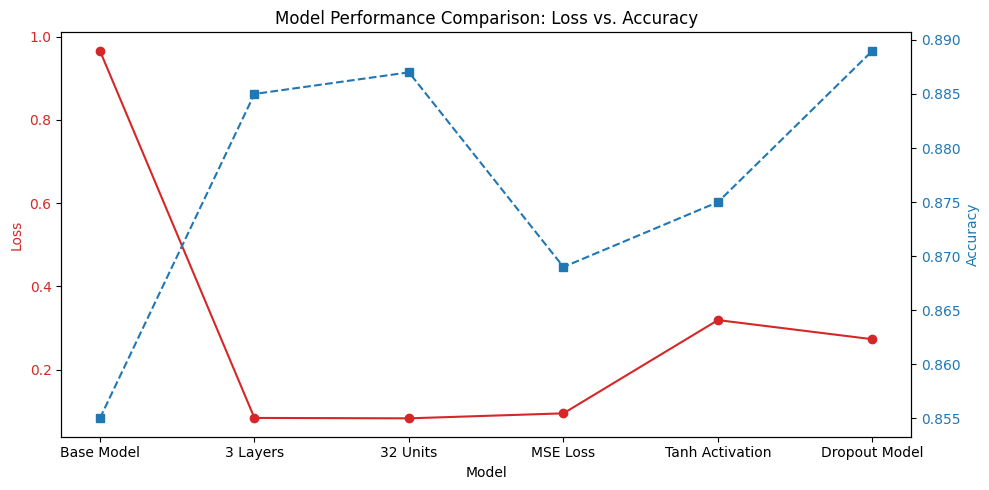

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["Base Model", "3 Layers", "32 Units", "MSE Loss", "Tanh Activation", "Dropout Model"]

# Testing Loss and Accuracy values
testing_loss = [0.966, 0.084, 0.083, 0.095, 0.319, 0.273]
testing_accuracy = [0.855, 0.885, 0.887, 0.869, 0.875, 0.889]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Testing Loss
ax1.set_xlabel("Model")
ax1.set_ylabel("Loss", color="tab:red")
ax1.plot(models, testing_loss, marker="o", linestyle="-", color="tab:red", label="Testing Loss")
ax1.tick_params(axis="y", labelcolor="tab:red")
# Create a second y-axis for Accuracy
ax2 = ax1.twinx()
ax2.set_ylabel("Accuracy", color="tab:blue")
ax2.plot(models, testing_accuracy, marker="s", linestyle="--", color="tab:blue", label="Testing Accuracy")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Title and layout
plt.title("Model Performance Comparison: Loss vs. Accuracy")
fig.tight_layout()
plt.show()